# Part 1
# shape of the dataset
# load the dataset
# get first 5 rows
# get last 5 row
# check if there are any na values in any column
# get the info of the dataframe
## Since we have na values in Age, ---> replace them with mean. Also for clarity check what is the median of Age column
## Completely remove column Cabin
## Replace embarked column with mode of Embarked column
# Do uni-variate analyses
# For continuous variable, plot histogram
# for categorical variables, plot bar chart
# Do multivariate analysis
# Can you check the correlation values among continuous columns



# Part 2

# Create test/train split
# use Logistic regression to predict target variable survived
# Use metrics to see how the model is performing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import math

In [2]:
titanic_dataset = pd.read_csv("https://raw.githubusercontent.com/manishanker/Statistics_ML_26Aug/master/titanic_data.csv")

In [5]:
titanic_dataset.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
titanic_dataset.tail(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [17]:
# Percentage of values which are null

titanic_dataset.isna().sum() / titanic_dataset.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.000000
dtype: float64

### going by the analysis above, i am going to drop cabin column, since it has lot of percentage of values missing

### Replace na values in Age column with mean

### Replace na values in Embarked column with mode

In [13]:
titanic_dataset["Age"].fillna(titanic_dataset["Age"].mean(), inplace=True)

In [14]:
titanic_dataset["Embarked"].fillna(str(titanic_dataset["Embarked"].mode()), inplace=True)

In [20]:
titanic_dataset.drop("Cabin", inplace=True, axis=0)

In [22]:
titanic_dataset.isna().sum() / titanic_dataset.shape[0]

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

# How to get total number of passengers

In [21]:
titanic_dataset.shape

(891, 11)

# Analyze dataset

In [24]:
titanic_dataset["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

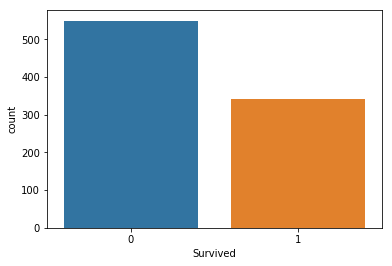

In [23]:
sns.countplot("Survived", data=titanic_dataset)

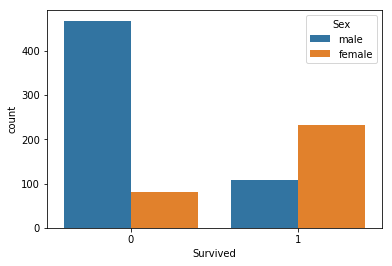

In [25]:
sns.countplot("Survived", hue="Sex", data=titanic_dataset)

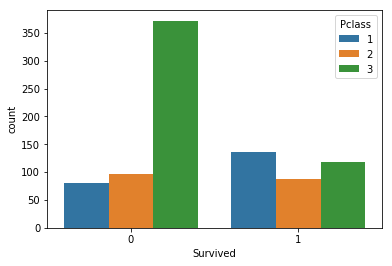

In [26]:
sns.countplot("Survived", hue="Pclass", data=titanic_dataset)

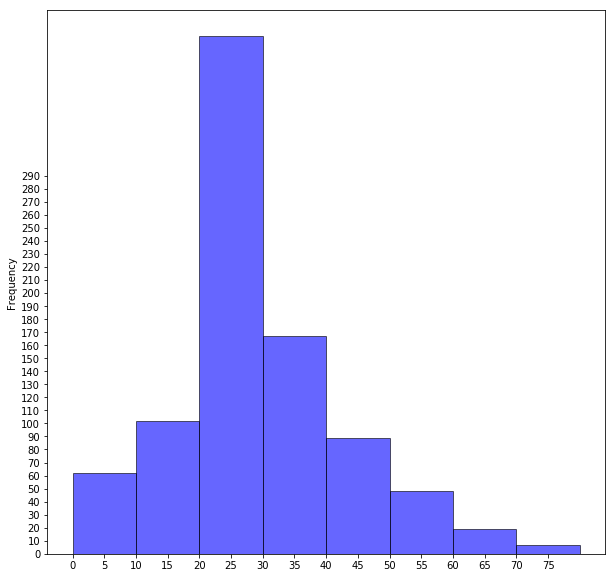

In [37]:
from matplotlib import pyplot as plt
plt.xticks(range(0,80,5))
plt.yticks(range(0,300,10))
titanic_dataset["Age"].plot.hist(bins=[0,10,20,30,40,50,60,70,80], 
                                 figsize=(10,10), alpha=0.6, facecolor="blue", edgecolor="black")

In [38]:
len(titanic_dataset[(titanic_dataset["Age"] <70) & (titanic_dataset["Age"] >=60)]["Age"])

19

In [48]:
titanic_new = titanic_dataset[titanic_dataset["Age"] < 60]

In [49]:
titanic_new.shape

(865, 11)

In [50]:
titanic_dataset.shape

(891, 11)

In [39]:
titanic_dataset.Age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

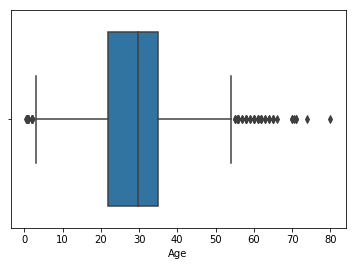

In [42]:
sns.boxplot(titanic_dataset['Age'])

In [40]:
age_under_5_bucket = [x for x in titanic_dataset.Age if x <=5 and x >=0]

In [41]:
len(age_under_5_bucket)

44

In [ ]:
titanic_dataset["Fare"].plot.hist()

In [ ]:
titanic_dataset.info()

In [ ]:
sns.countplot("SibSp", data=titanic_dataset)

In [ ]:
sns.countplot("Parch", data=titanic_dataset)

## Data wrangling

In [ ]:
# is the cleaning required for this ?
# imputation

In [ ]:
titanic_dataset.isna().sum()

In [ ]:
titanic_dataset.isnull() #use isna

In [ ]:
titanic_dataset.isnull().sum()

In [ ]:
titanic_dataset.isna().sum() # use this

In [3]:
titanic_dataset.drop("Cabin", axis=1, inplace=True)

In [4]:
titanic_dataset.dropna(inplace=True)

In [5]:
titanic_dataset.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
## Cleaning is done

In [ ]:
# Other ways is to replace the missing values with mean/median

In [6]:
sex = pd.get_dummies(titanic_dataset["Sex"], drop_first=True)
sex.head(10)

,male
0,1
1,0
2,0
3,0
4,1
6,1
7,1
8,0
9,0
10,0


In [7]:
embark = pd.get_dummies(titanic_dataset["Embarked"], drop_first=True)

In [8]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
6,0,1
7,0,1
8,0,1
9,0,0
10,0,1


In [9]:
pcl = pd.get_dummies(titanic_dataset["Pclass"], drop_first=True)

In [10]:
titanic_dataset = pd.concat([titanic_dataset, sex, embark, pcl], axis=1)

In [11]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [12]:
titanic_dataset.drop(["PassengerId", "Name", "Ticket",        "Sex", "Pclass", , "Embarked"], axis=1, inplace=True)

In [13]:
titanic_dataset.head(10)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1
6,0,54.0,0,0,51.8625,1,0,1,0,0
7,0,2.0,3,1,21.0750,1,0,1,0,1
8,1,27.0,0,2,11.1333,0,0,1,0,1
9,1,14.0,1,0,30.0708,0,0,0,1,0
10,1,4.0,1,1,16.7000,0,0,1,0,1


## Test, train split 

In [14]:
X = titanic_dataset.drop(["Survived"], axis=1)
y = titanic_dataset["Survived"]

In [54]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_std = scaler.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=444)

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
model = LogisticRegression()

In [48]:
X_train

,Age,SibSp,Parch,Fare,male,Q,S,2,3
816,23.0,0,0,7.9250,0,0,1,0,1
285,33.0,0,0,8.6625,1,0,0,0,1
675,18.0,0,0,7.7750,1,0,1,0,1
741,36.0,1,0,78.8500,1,0,1,0,0
493,71.0,0,0,49.5042,1,0,0,0,0
677,18.0,0,0,9.8417,0,0,1,0,1
534,30.0,0,0,8.6625,0,0,1,0,1
567,29.0,0,4,21.0750,0,0,1,0,1
847,35.0,0,0,7.8958,1,0,0,0,1
418,30.0,0,0,13.0000,1,0,1,1,0


In [49]:
model.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
predictions = model.predict(X_test)

In [52]:
from sklearn.metrics import classification_report

In [53]:
classification_report(y_test, predictions)

NameError: name 'y_test' is not defined

In [53]:
y_test.value_counts()

0    138
1     76
Name: Survived, dtype: int64

In [54]:
from collections import Counter
Counter(predictions)

Counter({1: 64, 0: 150})

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
confusion_matrix(y_test, predictions)

array([[120,  18],
       [ 30,  46]])

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(y_test, predictions)

0.7757009345794392

In [59]:
# With Standardscaler there is some boost in accuracy

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state=444)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.780373831775701

In [62]:
!pwd

/Users/manishanker.talusani/Desktop/Learnbay_sep19/jupyter_notebooks
